In [4]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix


In [5]:
## load the data
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,Email 1691,90,53,8,19,18,31,369,33,5,...,0,0,0,1,0,0,0,7,0,0
1691,Email 1692,2,4,1,1,4,7,34,1,0,...,0,0,0,6,0,0,0,4,0,0
1692,Email 1693,24,15,6,1,4,1,92,4,2,...,0,0,0,0,0,0,0,3,0,0
1693,Email 1694,0,2,1,2,1,5,10,0,0,...,0,0,0,0,0,0,0,2,0,1


In [6]:
df['Prediction'].value_counts()

0    1227
1     468
Name: Prediction, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 38.8+ MB


In [8]:
df = df.drop(columns=['Email No.'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 38.8 MB


In [10]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [11]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [12]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


c:\Users\yener\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,0
335,1,1
336,1,1
337,1,1


In [14]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.9852507374631269
[[242   2]
 [  3  92]]


In [15]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)


GaussianNB()

In [16]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})


,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,0
335,1,1
336,1,1
337,1,0


In [17]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.967551622418879
[[240   4]
 [  7  88]]


In [18]:
## K-Nearest Neighbors
Knn_model = KNeighborsClassifier(n_neighbors=5)
##train my model
Knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [19]:
## Make prediction
y_pred_knn = Knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,0
335,1,1
336,1,1
337,1,1


In [20]:
## Evaluate the naive bayes model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.8908554572271387
[[224  20]
 [ 17  78]]


In [22]:
## Decision tree classifier
Decision_tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5) 
Decision_tree_max_depth = DecisionTreeClassifier(max_depth=5)



In [23]:
## trainiong my models
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)
Decision_tree_max_depth.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [24]:
## make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [25]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,0
335,1,0
336,1,1
337,1,0


In [26]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,0
335,1,0
336,1,1
337,1,0


In [27]:
## make a dataframe prediction
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth3})

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,1
335,1,1
336,1,1
337,1,1


In [28]:
## model evaluation
## Evaluate the gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)




print(accuracy_gini)
print(conf_mat_gini)

0.8407079646017699
[[239   5]
 [ 49  46]]


In [29]:
## Evaluate the entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)


print(accuracy_entropy)
print(conf_mat_entropy)

0.8407079646017699
[[238   6]
 [ 48  47]]


In [30]:
## Evaluate the max_depth
accuracy_max_depth = accuracy_score(y_test, y_pred_depth3)
conf_mat_max_depth = confusion_matrix(y_test, y_pred_depth3)


print(accuracy_max_depth)
print(conf_mat_max_depth)

0.8967551622418879
[[215  29]
 [  6  89]]


In [31]:
## SVM
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [32]:

#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [33]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)


In [34]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,1
335,1,1
336,1,1
337,1,1


In [35]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sigmoid})

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
334,0,0
335,1,0
336,1,1
337,1,1


In [36]:
## make a dataframe prediction for linear kernel
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,0
335,1,0
336,1,0
337,1,1


In [37]:
#Calculate the accuracy of our model
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.9469026548672567
Sigmoid kernel Accuracy: 0.7020648967551623
rbf kernelAccuracy: 0.799410029498525


In [38]:
## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print(conf_mat_linear)
print(conf_mat_sigmoid)
print(conf_mat_rbf)

[[234  10]
 [  8  87]]
[[198  46]
 [ 55  40]]
[[241   3]
 [ 65  30]]


<Axes: >

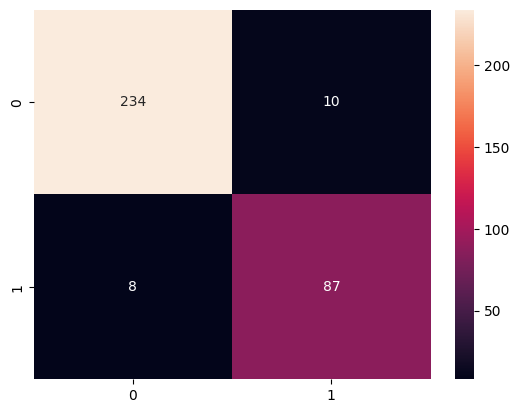

In [39]:
sns.heatmap(conf_mat_linear, annot=True, fmt='.0f')

In [40]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       244
           1       0.90      0.92      0.91        95

    accuracy                           0.95       339
   macro avg       0.93      0.94      0.93       339
weighted avg       0.95      0.95      0.95       339



In [41]:
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc)

AUC: 0.937403


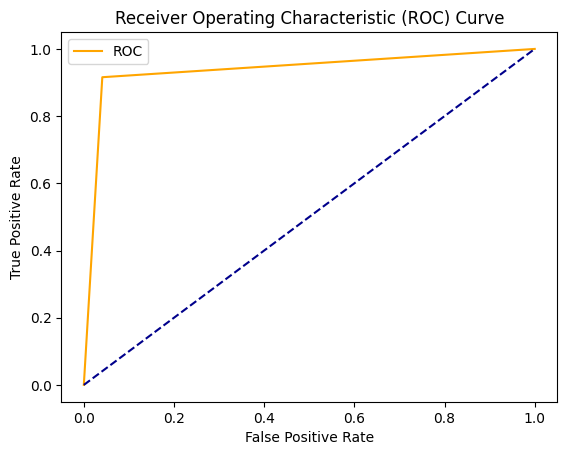

In [42]:
fpr, tpr = roc_curve(y_test, y_pred_linear)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [44]:
## Neural Network
## initialise the NN
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 15, kernel_initializer= 'uniform', activation = 'relu', input_dim = 3000))
## hidden layer
model.add(Dense(units= 5, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN

model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])





In [45]:
## train the model
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split= 0.30)

Epoch 1/100
95/95 [==============================] - 1s 5ms/step - loss: 0.6645 - accuracy: 0.7397 - val_loss: 0.6387 - val_accuracy: 0.6904
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.7397 - val_loss: 0.5169 - val_accuracy: 0.6904
Epoch 3/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.7397 - val_loss: 0.4151 - val_accuracy: 0.6904
Epoch 4/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.7397 - val_loss: 0.3664 - val_accuracy: 0.6904
Epoch 5/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.7397 - val_loss: 0.3622 - val_accuracy: 0.6904
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.7397 - val_loss: 0.3161 - val_accuracy: 0.6904
Epoch 7/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.7397 - val_loss: 0.3054 - val_accuracy: 0.6904
Epoch 8/100
9

In [46]:
## make prediction
y_pred_ann = model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)

11/11 [==============================] - 0s 1ms/step


In [47]:
print(y_test.shape)
print(y_pred_ann.shape)

(339,)
(339, 1)


In [48]:
y_pred_ann = y_pred_ann.flatten()

In [49]:
print(y_test.shape)
print(y_pred_ann.shape)

(339,)
(339,)


In [50]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
334,0,0
335,1,1
336,1,1
337,1,1


In [51]:
##classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       244
           1       0.95      0.97      0.96        95

    accuracy                           0.98       339
   macro avg       0.97      0.97      0.97       339
weighted avg       0.98      0.98      0.98       339



In [52]:
cm = confusion_matrix(y_test, y_pred_ann)
cm

array([[239,   5],
       [  3,  92]], dtype=int64)

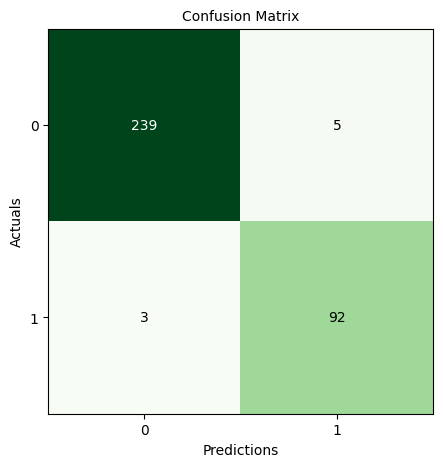

In [53]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

In [54]:
auc = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc)

AUC: 0.973965


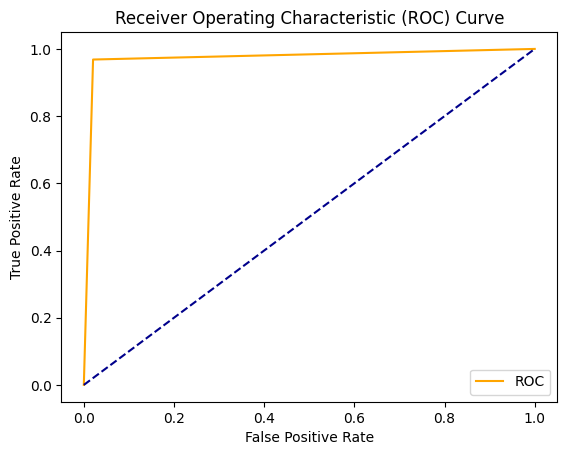

In [55]:
fpr, tpr = roc_curve(y_test, y_pred_ann)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [56]:
## save the model
model.save('ann_model')

2023-02-22 19:39:19.580 WARNING absl: Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.
2023-02-22 19:39:20.007 INFO    tensorflow: Assets written to: ann_model\assets


In [57]:
## save the logistic regression model
import pickle
#sace the model as a file
with open ('logistic_regression_model.pkl','wb') as file:
    pickle.dump(model_LR,file)